<a href="https://colab.research.google.com/github/maxkleiner/maXbox/blob/master/maxnet24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

This tutorial shows a Regressor, Classifier and Cluster with a Support Vector Machine and KMeans from sklearn

We do have a dataset of 2 Columns samples and 1 Column Target of Label 0 and 1

In [0]:
import requests
r = requests.get(http://www.softwareschule.ch/examples/data_multivar2.txt)
open('data_multivar2.txt', 'wb').write(r.content)
from google.colab import files
files.download('data_multivar2.txt')

In [0]:
print (uploaded['data_multivar2.txt'][:200].decode('utf-8') + '...')

5.35,4.48,0
6.72,5.37,0
3.57,5.25,0
4.77,7.65,1
2.25,4.07,1
6.08,3.01,1
4.91,5.52,0
5.79,4.09,0
5.03,5.92,0
5.51,7.32,1
3.49,4.08,1
7.32,2.71,1
4.5,4.76,0
5.35,4.94,0
5.18,4.91,0
4.77,9.15,1
2.5,4.35,...


In [0]:
print(type(uploaded))
print(type(files))

<class 'dict'>
<class 'module'>


Now convert to a dataframe with pandas and define column names


I load some machine learning data from a CSV file of softwareschule, see link below. 

The first 2 columns are observations and the remaining column is the target to test a feature predictor.

In [0]:
import pandas as pd
import io

BASEPA = 'C:/maXbox/maxbox3/maxbox3/maXbox4/crypt/viper2/'
# http://www.softwareschule.ch/examples/data_multivar2.txt

df = pd.read_csv(io.StringIO(uploaded['data_multivar2.txt'].decode('utf-8')))
#df = pd.read_csv(BASEPA+'data/data_multivar2.txt') #read data from CSV file
df.columns = ['X1','X2','Y']
df

,X1,X2,Y
0,6.72,5.37,0
1,3.57,5.25,0
2,4.77,7.65,1
3,2.25,4.07,1
4,6.08,3.01,1
...,...,...,...
294,5.24,4.92,0
295,5.14,5.14,0
296,5.28,8.66,1
297,2.68,2.49,1


now make a scatter plot


In [0]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR, SVC 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score

df.info()
Datarange = 299

X=df.iloc[:,[0,1]]
y=df['Y']
# switch between regressor or classifier
model = SVR(gamma='auto')  #='scale' 
model = SVC(gamma='auto')  #='scale'
print(model)
print(X)

model.fit(X,y)
y_pred = model.predict(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
X1    299 non-null float64
X2    299 non-null float64
Y     299 non-null int64
dtypes: float64(2), int64(1)
memory usage: 7.1 KB
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
       X1    X2
0    6.72  5.37
1    3.57  5.25
2    4.77  7.65
3    2.25  4.07
4    6.08  3.01
..    ...   ...
294  5.24  4.92
295  5.14  5.14
296  5.28  8.66
297  2.68  2.49
298  7.28  2.63

[299 rows x 2 columns]


now the plot and score of classifier and also Mean squared error as regression loss

accuracy score: the set of labels predicted for a sample must exactly match the corresponding set of labels in y (y_true).


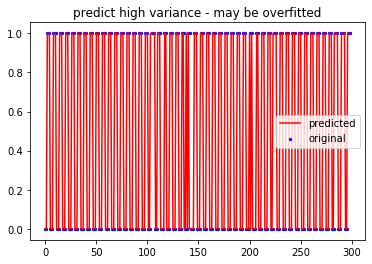

SCO:  0.959866220735786
ACC:  0.959866220735786
MSE:  0.20033416898825335


In [0]:
x_ax=range(Datarange)
plt.scatter(x_ax, y, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=1.5, color="red", label="predicted")
plt.title('predict high variance - may be overfitted')
plt.legend()
plt.show() 

score = model.score(X,y)
print('SCO: ',score)
# if regression: We can't have more than one value on y_type => The set is no more needed
print('ACC: ',accuracy_score(y, y_pred, normalize=True))
print('MSE: ',mean_squared_error(y, y_pred, squared=False))

we try to plot the 2 features as feature contribution


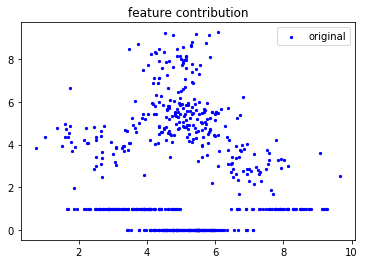

SVM Score: 0.959866220735786


In [0]:
x_ax=range(Datarange)
#print(X)
plt.scatter(df.iloc[:,[0,1]], df.iloc[:,[1,2]], s=5, color="blue", label="original")
#plt.plot(x_ax, y, lw=1.5, color="red", label="predicted")
plt.title('feature contribution')
plt.legend()
plt.show() 

score=model.score(X,y)
print('SVM Score:',score)

In [0]:
# check the performance
from sklearn import datasets, metrics

# if regression: ValueError: Classification metrics can't handle a mix of binary and continuous targets

print('Confusion Matrix: \n',metrics.confusion_matrix(y, y_pred),'\n')
print('Classification Report: \n',metrics.classification_report(y, y_pred),'\n')


Confusion Matrix: 
 [[143   6]
 [  6 144]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       149
           1       0.96      0.96      0.96       150

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299
 



now we show the classifier in his discrimination density

149 points belong to zero as blue 
and 150 points to class one as brown


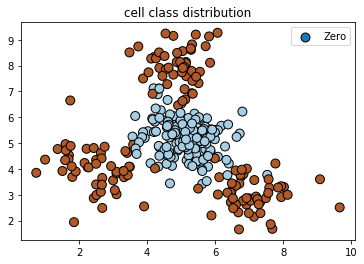

In [0]:
plt.scatter(df.X1, df.X2, c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired, label='Zero')

plt.title('cell class distribution')
plt.legend()
plt.show() 


now we check the prediction to compare visual

we just change c=y to c=pred_y


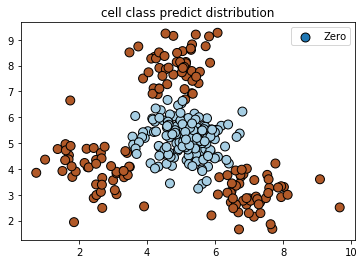

In [0]:
plt.scatter(df.X1, df.X2, c=y_pred, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired, label='Zero')

plt.title('cell class predict distribution')
plt.legend()
plt.show() 

so the highlight is to show the classifier boundaries as Explainable AI


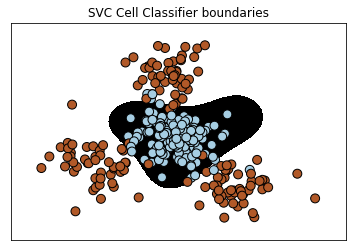

In [0]:
# Plot the classifier boundaries on input data
def Plot_Classifier(classifier, X, y, title='Classifier boundaries', annotate=False):
    # define ranges to plot the figure 
    x_min, x_max = min(X[:, 0])- 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1])- 1.0, max(X[:, 1]) + 1.0
    # denotes the step size that will be used in the mesh grid
    step_size = 0.01
    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])
    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)
    # Plot the output using a colored plot 
    plt.figure()
    # Set the title
    plt.title(title)
    # choose a color scheme you can find all options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.gray)
    # Overlay the training points on the plot 
    plt.scatter(X[:,0], X[:,1], c=y, s=80, edgecolors='black',linewidth=1,cmap=plt.cm.Paired,label='Zero')

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())
    # specify the ticks on the X and Y axes
    plt.xticks(())
    plt.yticks(())
    if annotate:
        for x, y in zip(X[:, 0], X[:, 1]):
            # Full documentation of the function available here: 
            # http://matplotlib.org/api/text_api.html#matplotlib.text.Annotation
            plt.annotate(
                '(' + str(round(x, 1)) + ',' + str(round(y, 1)) + ')',
                xy = (x, y), xytext = (-15, 15), 
                textcoords = 'offset points', 
                horizontalalignment = 'right', 
                verticalalignment = 'bottom', 
                bbox = dict(boxstyle = 'round,pad=0.6', fc = 'white', alpha = 0.8),
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))

X1 = np.array(X)
y1 = np.array(y)
Plot_Classifier(model, X1, y1, title='SVC Cell Classifier boundaries', annotate=False)
plt.show()

Can you see the six false positives (blue outside of black area)? 

Clustering: next we test a cluster method

To create a K-means cluster with two clusters, simply type the following script:

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Now let's see what centroid values the algorithm generated for the final clusters. 


In [0]:
print(kmeans.cluster_centers_)

#The output is a one dimensional array of 299 elements corresponding to the clusters assigned to our data points.

print(kmeans.labels_)

[[4.41357143 5.66839286]
 [6.6492     3.42373333]]
[1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 1]


Let's plot the data points again on the graph and visualize how the data has been clustered.

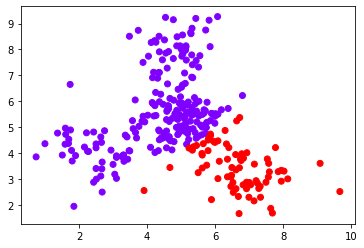

In [0]:
#plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(df.X1,df.X2, c=kmeans.labels_, cmap='rainbow')


as we know we have 4 segments lets try with 4 clusters:

[[2.54156863 4.04607843]
 [5.10820144 5.19359712]
 [7.00163636 3.09672727]
 [4.86259259 7.92444444]]


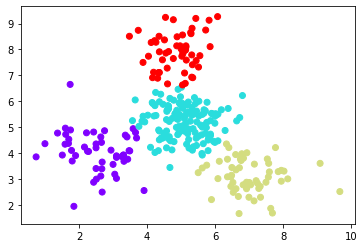

In [0]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X)
print(kmeans4.cluster_centers_)
plt.scatter(df.X1,df.X2, c=kmeans4.labels_, cmap='rainbow')

Now let's plot the points along with the centroid coordinates of each 

cluster to see how the centroid positions effects clustering. 

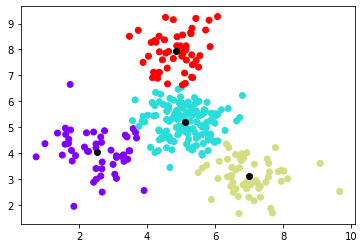

In [0]:
import numpy as np
X = np.array(X)
plt.scatter(X[:,0], X[:,1], c=kmeans4.labels_, cmap='rainbow')
plt.scatter(kmeans4.cluster_centers_[:,0] ,kmeans4.cluster_centers_[:,1], color='black')

In our last experiment we manipulate an outlier, so we set the right down bottom bubble to label 0 instead of 1


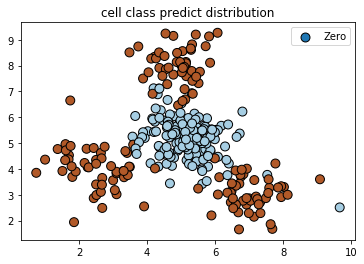

In [0]:
#df.iloc[292,[2]]=0
df.loc[292, 'Y'] = 0
plt.scatter(df.X1, df.X2, c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.Paired, label='Zero')

plt.title('cell class predict distribution')
plt.legend()
plt.show() 

In [0]:
model.fit(X,y)
y_pred = model.predict(X)
print('Score: ',model.score(X,y))
print('Confusion Matrix: \n',metrics.confusion_matrix(y, y_pred),'\n')

Score:  0.9565217391304348
Confusion Matrix: 
 [[143   7]
 [  6 143]] 



We do have one more false positive (7 instead of 6)


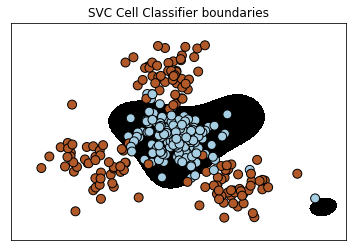

In [0]:
X1 = np.array(X)
y1 = np.array(y)
Plot_Classifier(model, X1, y1, title='SVC Cell Classifier boundaries', annotate=False)
plt.show()

So the new classifier spot is close behind of the outlier but we can improve that with a hyperparameter called C Regularization.

C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. 
Increasing C values may lead to overfitting the training data.

In [0]:
smodel = SVC(gamma='auto', C=10)  #='scale'
smodel.fit(X,y)
y_pred = smodel.predict(X)
print('Score: ',smodel.score(X,y))
print('Confusion Matrix: \n',metrics.confusion_matrix(y, y_pred),'\n')

Score:  0.959866220735786
Confusion Matrix: 
 [[146   4]
 [  8 141]] 



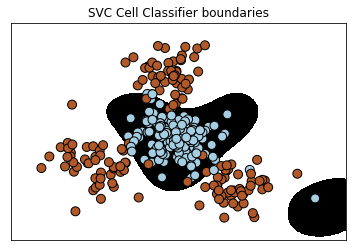

In [0]:
X1 = np.array(X)
y1 = np.array(y)
Plot_Classifier(smodel, X1, y1, title='SVC Cell Classifier boundaries', annotate=False)
plt.show()

We increase now the hyperparameter C to 100:

Score:  0.9632107023411371
Confusion Matrix: 
 [[146   4]
 [  7 142]] 



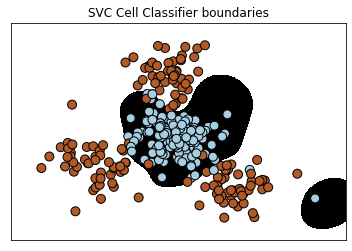

In [0]:
ssmodel = SVC(gamma='auto', C=100)  #='scale'
ssmodel.fit(X,y)
y_pred = ssmodel.predict(X)
print('Score: ',ssmodel.score(X,y))
print('Confusion Matrix: \n',metrics.confusion_matrix(y, y_pred),'\n')
X1= np.array(X); y1= np.array(y)
Plot_Classifier(ssmodel, X1, y1, title='SVC Cell Classifier boundaries', annotate=False)
plt.show()

We do have the best score (0.96) now but it is overfitted!